In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import seaborn as sns

In [2]:
train_df = pd.read_csv("devim/train.csv")
train_df.head()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.0,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.0,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.0,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.0,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.0,...,0.0,0,0.00,0,0,5,35000,34,NaN,0


In [3]:
test_df = pd.read_csv("devim/test.csv")
test_df.head()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5499904,16000.0,0,6890,1,33722.12,33722,9999,0.0,0.00,...,0.00,0,0.00,0,0,5,35000,65,NaN,0
1,5501986,0.0,0,0,5,5000.00,0,289,0.0,0.00,...,0.00,0,0.00,0,0,3,35000,7,NaN,0
2,5503586,133000.0,1,284685,9,16600.00,716305,6,50000.0,593315.33,...,16600.00,4,2409.33,1,4,4,50000,18,1.0,1
3,5507043,10000.0,0,0,0,0.00,0,9999,0.0,0.00,...,0.00,0,9968.84,0,0,5,20000,58,NaN,0
4,5512692,120500.0,0,1293089,8,9605.18,1562678,33,0.0,1392907.34,...,1221.81,1,4442.42,1,0,3,50000,20,0.0,1


In [4]:
train_df.describe()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
count,2.311600e+04,2.311600e+04,23116.000000,2.311600e+04,23116.000000,2.311600e+04,2.311600e+04,23116.000000,23116.000000,2.311600e+04,...,23116.000000,23116.000000,2.311600e+04,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,7269.000000,23116.000000
mean,6.060602e+06,4.424794e+04,1.284262,1.653574e+05,3.760642,4.070925e+03,1.284212e+05,2615.988925,10672.104919,8.414683e+04,...,1107.137568,3.474087,4.878172e+03,0.118576,1.080637,3.433250,39363.189998,47.632203,0.270051,0.314458
std,3.678480e+05,1.006016e+05,2.373415,4.788942e+05,5.057107,2.689042e+04,3.890718e+05,4228.621029,37246.943546,3.054724e+05,...,7073.931364,9.202313,3.793714e+04,0.466854,2.137757,1.370812,13887.644526,27.615823,0.444016,0.464310
min,5.498546e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.739749e+06,0.000000e+00,0.000000,3.000000e+03,0.000000,0.000000e+00,2.000000e+03,13.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,35000.000000,25.000000,0.000000,0.000000
50%,6.020794e+06,5.000000e+03,0.000000,3.083450e+04,2.000000,0.000000e+00,1.500000e+04,83.500000,0.000000,5.000000e+03,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.000000,35000.000000,46.000000,0.000000,0.000000
75%,6.445488e+06,4.972685e+04,2.000000,1.357758e+05,5.000000,3.000000e+03,7.500000e+04,2070.500000,0.000000,3.496056e+04,...,0.000000,3.000000,0.000000e+00,0.000000,1.000000,5.000000,50000.000000,70.000000,1.000000,1.000000
max,6.697265e+06,5.739786e+06,25.000000,3.030997e+07,67.000000,1.914581e+06,1.200000e+07,9999.000000,878000.000000,1.150825e+07,...,673495.420000,344.000000,2.878197e+06,10.000000,48.000000,5.000000,65000.000000,99.000000,1.000000,1.000000


In [5]:
test_df.describe()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
count,1.218000e+03,1218.000000,1218.000000,1.218000e+03,1218.000000,1.218000e+03,1.218000e+03,1218.000000,1218.000000,1.218000e+03,...,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.00000,1218.000000,1218.000000,373.000000,1218.00000
mean,6.211891e+06,42738.170238,1.162562,1.586558e+05,3.486043,1.223361e+04,1.354692e+05,2659.235632,10089.632668,7.793250e+04,...,1124.139532,3.002463,4401.889319,0.133826,0.963054,3.40312,39426.929392,48.511494,0.265416,0.30624
std,4.129495e+05,85083.376473,2.452476,5.009451e+05,4.539452,2.608477e+05,4.488645e+05,4224.121482,35316.122541,2.711290e+05,...,6185.287603,8.070814,24798.951599,0.521664,2.043355,1.37565,13836.229482,27.636155,0.442147,0.46112
min,5.499904e+06,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.00000
25%,5.774225e+06,0.000000,0.000000,2.000000e+03,0.000000,0.000000e+00,2.000000e+03,14.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,35000.000000,27.000000,0.000000,0.00000
50%,6.466954e+06,5000.000000,0.000000,2.673550e+04,2.000000,0.000000e+00,1.500000e+04,138.000000,0.000000,3.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,35000.000000,46.000000,0.000000,0.00000
75%,6.587276e+06,51887.500000,1.000000,1.245895e+05,5.000000,3.000000e+03,8.204150e+04,2413.750000,0.000000,3.000000e+04,...,0.000000,2.000000,0.000000,0.000000,1.000000,5.00000,50000.000000,69.750000,1.000000,1.00000
max,6.697255e+06,867000.000000,40.000000,1.204294e+07,31.000000,9.046414e+06,9.600000e+06,9999.000000,576000.000000,4.952610e+06,...,177738.850000,97.000000,442155.730000,7.000000,22.000000,5.00000,60000.000000,98.000000,1.000000,1.00000


Тут мы кстати видим, что в данных у нас нет пропусков (кроме столбца `bad`)

In [6]:
train_df.shape

(23116, 25)

In [7]:
test_df.shape

(1218, 25)

In [8]:
all(train_df.dtypes == test_df.dtypes)

True

Все типы переменных на обучающей и тестовой выборке совпадают

### Описание фичей
##### Переменные, характеризующие кредитную историю клиента
`cred_sum_cc_all` - сумма кредитов по кредитным картам
`mfo_inqs_count_month` - количество запросов на кредиты в другие в МФО
`all_closed_creds_sum_all` количество закрытых кредитов
`bank_inqs_count_quarter` - количество запросов на кредиты в банки
`cred_max_overdue_max_ly` - максимальная просрочка за год
`all_active_creds_sum_all` - денежная сумма всех активных кредитов
`mfo_last_days_all` - Количество дней с последнего займа в МФО
`cred_sum_cc_ly` - Сумма лимитов кредитных карт, оформленных за последний год
`cred_sum_debt_all_all` - Сумма задолженности по всем кредитам
`all_closed_creds_sum_ly` - Сумма закрытых кредитов за последний год
`mfo_cred_mean_sum_3lm` - Средняя сумма МФО кредитов, выданных за последние 3 месяца
`delay_more_sum_all` - Количество просрочек более чем на 90 дней по всем кредитам
`all_creds_count_all` - Общее количество кредитов
`cred_day_overdue_all_sum_all` - Суммарное количество дней просрочки текущих активных кредитов
`cred_max_overdue_max_3lm` - Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца
`mfo_closed_count_ly` - Количество закрытых МФО кредитов, взятых за последний год
`cred_sum_overdue_cc_all` - Сумма просрочек по кредитным картам
`count_overdue_all_3lm` - Количество кредитов на просрочке, взятых за последние 3 месяца
`all_creds_count_lm` - Количество кредитов, взятых за последний месяц
`region` - регион подачи заявки
##### Переменные характеризующие клиента
`work_code` - Профессия.
- 5 - рабочие профессии (слесарь, токарь).
- 3 - офисный работник (бухгалтер, программист).
- 1 - госслужащий (полицейский, медсестра)

`month_income` - доход
##### Целевые переменные:
`bad` - 1 - кредит просрочен, 0 - кредит возвращен, `nan` - отказ.
`approved` - 1 - одобрено, 0 - отказано.

In [42]:
train_df.loc[train_df['bad'].notna()].shape

(7269, 25)

Напишем функцию, которая будет нам выводить в текством виде информацию о признаке в двух выборках

In [28]:
def dist_info(feat, first_sample, second_sample):
    """
    Функция которая выводит информацию о признаке в двух выборок
    :param feat: Признак
    :param first_sample: Выборка выданных кредитов
    :param second_sample: Вся выборка
    """
    output = f"Сравнение признака {feat}:\n"

    # Выборочное среднее
    output += f"Выборочное среднее на выборке выданных кредитов = {first_sample[feat].mean()}\n"
    output += f"Выборочное среднее на всей выборке = {second_sample[feat].mean()}\n\n"

    # Медиана
    output += f"Медиана на выборке выданных кредитов = {first_sample[feat].median()}\n"
    output += f"Медиана на всей выборке = {second_sample[feat].median()}\n\n"

    # Дисперсия
    output += f"Дисперсия на выборке выданных кредитов = {first_sample[feat].var()}\n"
    output += f"Дисперсия на всей выборке = {second_sample[feat].var()}\n\n"

    # Стандартное отклонение (корень из дисперсии)
    output += f"Стандартное отклонение на выборке выданных кредитов = {first_sample[feat].std()}\n"
    output += f"Стандартное отклонение на всей выборке = {second_sample[feat].std()}\n"

    return output

Для статистического сравнения выборок будем использовать 4 теста из `scipy`
Напишем функцию для этого сравнения

In [29]:
# Эти списки нам понадобятся для анализа стат.критериев по всем признакам
feature_name = []
t_test = []
u_test = []
ks_test = []
lev_test = []

In [30]:
def stat_test(feat, first_sample, second_sample):
    """
    Функция, которая выводит информацию о результате t-теста
    :param feat: Признак, по которому сравниваются выборки
    :param first_sample: Выборка выданных кредитов
    :param second_sample: Вся выборка
    :return: Информация в текстовом виде
    """
    x = first_sample[feat]
    y = second_sample[feat]
    feature_name.append(feat)

    stat_value, p_value = st.ttest_ind(y, x)
    output = "t-критерий Стюдента:\n"
    output += f"Значение критерия = {stat_value}, p-value = {p_value}\n\n"
    t_test.append(p_value)

    stat_value2, p_value2 = st.mannwhitneyu(y, x)
    output += "u-критерий Манна-Уитни\n"
    output += f"Значение критерия = {stat_value2}, p-value = {p_value2}\n\n"
    u_test.append(p_value2)

    stat_value3, p_value3 = st.ks_2samp(y, x)
    output += "Критерий Колмогорова-Смирнова\n"
    output += f"Значение критерия = {stat_value3}, p-value = {p_value3}\n\n"
    ks_test.append(p_value3)

    stat_value4, p_value4 = st.levene(y, x)
    output += "Тест Левена\n"
    output += f"Значение критерия = {stat_value4}, p-value = {p_value4}\n\n"
    lev_test.append(p_value4)

    return output


In [31]:
def compare_samples(feat, first_sample=train_df.loc[train_df['bad'].notna()], second_sample=train_df):
    output = "Свойства распределений:\n"
    output += dist_info(feat=feat, first_sample=first_sample, second_sample=second_sample)

    output += "\nСтатистические тесты для сравнения распределений:\n"
    output += stat_test(feat, first_sample=first_sample, second_sample=second_sample)

    return output

Теперь будем по отдельности смотреть на каждую фичу
Начнём с `cred_sum_cc_all` - сумма кредитов по кредитным картам

In [32]:
print(compare_samples('cred_sum_cc_all'))

Свойства распределений:
Сравнение признака cred_sum_cc_all:
Выборочное среднее на выборке выданных кредитов = 72930.69684550833
Выборочное среднее на всей выборке = 44247.935382851705

Медиана на выборке выданных кредитов = 30000.0
Медиана на всей выборке = 5000.0

Дисперсия на выборке выданных кредитов = 12949381084.387712
Дисперсия на всей выборке = 10120681248.761553

Стандартное отклонение на выборке выданных кредитов = 113795.34737583832
Стандартное отклонение на всей выборке = 100601.59665115437

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -20.527052110447098, p-value = 5.285566222778408e-93

u-критерий Манна-Уитни
Значение критерия = 65432964.5, p-value = 1.8331335629670886e-189

Критерий Колмогорова-Смирнова
Значение критерия = 0.1886957656731762, p-value = 7.023697323664145e-173

Тест Левена
Значение критерия = 300.37406547451485, p-value = 5.7374127677921874e-67




In [33]:
train_df['mfo_inqs_count_month'].value_counts()

0     13087
1      3898
2      2110
3      1336
4       815
5       594
6       355
7       235
8       187
9       132
10       91
11       55
12       52
14       37
13       33
15       24
16       16
17       13
20       11
18        9
19        8
23        5
22        5
25        4
21        2
24        2
Name: mfo_inqs_count_month, dtype: int64

`mfo_inqs_count_month` - количество запросов на кредиты в другие в МФО

In [43]:
print(compare_samples('mfo_inqs_count_month'))

Свойства распределений:
Сравнение признака mfo_inqs_count_month:
Выборочное среднее на выборке выданных кредитов = 2.1254643004539826
Выборочное среднее на всей выборке = 1.2842619830420487

Медиана на выборке выданных кредитов = 1.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 8.905555387725093
Дисперсия на всей выборке = 5.633100346503599

Стандартное отклонение на выборке выданных кредитов = 2.9842177178827103
Стандартное отклонение на всей выборке = 2.3734153337550508

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -24.696492492798473, p-value = 2.4153480212812933e-133

u-критерий Манна-Уитни
Значение критерия = 65694364.5, p-value = 2.7385957732327736e-203

Критерий Колмогорова-Смирнова
Значение критерия = 0.1915401769077183, p-value = 3.672665352425954e-178

Тест Левена
Значение критерия = 327.94157940908593, p-value = 6.531564268570812e-73




`all_closed_creds_sum_all` - количество закрытых кредитов

In [44]:
print(compare_samples('all_closed_creds_sum_all'))

Свойства распределений:
Сравнение признака all_closed_creds_sum_all:
Выборочное среднее на выборке выданных кредитов = 271742.5301967258
Выборочное среднее на всей выборке = 165357.35802041876

Медиана на выборке выданных кредитов = 91811.0
Медиана на всей выборке = 30834.5

Дисперсия на выборке выданных кредитов = 296662069134.4915
Дисперсия на всей выборке = 229339675667.5227

Стандартное отклонение на выборке выданных кредитов = 544666.9341299245
Стандартное отклонение на всей выборке = 478894.2217938349

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -15.968675842084536, p-value = 3.6109697777484094e-57

u-критерий Манна-Уитни
Значение критерия = 58298148.5, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.2465689680410077, p-value = 1.3772002664039175e-296

Тест Левена
Значение критерия = 148.3093588725564, p-value = 4.874250259384771e-34




Наверное тут имеется в виду сумма всех закрытых кредитов

`bank_inqs_count_quarter` - количество запросов на кредиты в банки

In [45]:
print(compare_samples('bank_inqs_count_quarter'))

Свойства распределений:
Сравнение признака bank_inqs_count_quarter:
Выборочное среднее на выборке выданных кредитов = 6.622506534598982
Выборочное среднее на всей выборке = 3.7606419795812425

Медиана на выборке выданных кредитов = 5.0
Медиана на всей выборке = 2.0

Дисперсия на выборке выданных кредитов = 40.71328535098233
Дисперсия на всей выборке = 25.574329745750504

Стандартное отклонение на выборке выданных кредитов = 6.380696306123833
Стандартное отклонение на всей выборке = 5.057106855283019

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -39.387030280964886, p-value = 0.0

u-критерий Манна-Уитни
Значение критерия = 54932058.0, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.26846663234426593, p-value = 0.0

Тест Левена
Значение критерия = 448.17935191313546, p-value = 9.296625543682678e-99




`cred_max_overdue_max_ly` - максимальная просрочка за год

In [46]:
print(compare_samples('cred_max_overdue_max_ly'))

Свойства распределений:
Сравнение признака cred_max_overdue_max_ly:
Выборочное среднее на выборке выданных кредитов = 3200.177497592516
Выборочное среднее на всей выборке = 4070.925131078041

Медиана на выборке выданных кредитов = 0.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 78796467.51097448
Дисперсия на всей выборке = 723094820.1030327

Стандартное отклонение на выборке выданных кредитов = 8876.73743618535
Стандартное отклонение на всей выборке = 26890.422460478985

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = 2.714635349787848, p-value = 0.006638623522751355

u-критерий Манна-Уитни
Значение критерия = 81694558.0, p-value = 3.215493472298796e-05

Критерий Колмогорова-Смирнова
Значение критерия = 0.03142758191259476, p-value = 3.5228541617464523e-05

Тест Левена
Значение критерия = 7.369245082317792, p-value = 0.006638623522751609




`all_active_creds_sum_all` - денежная сумма всех активных кредитов

In [47]:
print(compare_samples('all_active_creds_sum_all'))

Свойства распределений:
Сравнение признака all_active_creds_sum_all:
Выборочное среднее на выборке выданных кредитов = 229576.36208556886
Выборочное среднее на всей выборке = 128421.21677625887

Медиана на выборке выданных кредитов = 57330.0
Медиана на всей выборке = 15000.0

Дисперсия на выборке выданных кредитов = 243789973903.4096
Дисперсия на всей выборке = 151376879374.27545

Стандартное отклонение на выборке выданных кредитов = 493750.922939299
Стандартное отклонение на всей выборке = 389071.81775897805

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -18.060228443438298, p-value = 1.5717067803818014e-72

u-критерий Манна-Уитни
Значение критерия = 56644154.5, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.26645119707168835, p-value = 0.0

Тест Левена
Значение критерия = 238.66359665442607, p-value = 1.2310847745584734e-53




`mfo_last_days_all` - Количество дней с последнего займа в МФО

In [48]:
print(compare_samples('mfo_last_days_all'))

Свойства распределений:
Сравнение признака mfo_last_days_all:
Выборочное среднее на выборке выданных кредитов = 1320.6761590315036
Выборочное среднее на всей выборке = 2615.988925419623

Медиана на выборке выданных кредитов = 14.0
Медиана на всей выборке = 83.5

Дисперсия на выборке выданных кредитов = 11050247.33815057
Дисперсия на всей выборке = 17881235.805112045

Стандартное отклонение на выборке выданных кредитов = 3324.1912306831223
Стандартное отклонение на всей выборке = 4228.621028788469

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = 23.897350522943775, p-value = 4.663834493002853e-125

u-критерий Манна-Уитни
Значение критерия = 112470740.0, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.3104594516828653, p-value = 0.0

Тест Левена
Значение критерия = 568.8271724497337, p-value = 1.4141254888814227e-124




`cred_sum_cc_ly` - Сумма лимитов кредитных карт, оформленных за последний год

In [49]:
print(compare_samples('cred_sum_cc_ly'))

Свойства распределений:
Сравнение признака cred_sum_cc_ly:
Выборочное среднее на выборке выданных кредитов = 24717.386837254096
Выборочное среднее на всей выборке = 10672.104918671052

Медиана на выборке выданных кредитов = 0.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 3041900786.6841216
Дисперсия на всей выборке = 1387334803.483769

Стандартное отклонение на выборке выданных кредитов = 55153.42950972425
Стандартное отклонение на всей выборке = 37246.94354552826

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -24.734506766394713, p-value = 9.601327074734767e-134

u-критерий Манна-Уитни
Значение критерия = 67546483.5, p-value = 1.4573902202907428e-229

Критерий Колмогорова-Смирнова
Значение критерия = 0.18936730565416682, p-value = 4.04569879043131e-174

Тест Левена
Значение критерия = 611.7958249768259, p-value = 9.601327074740873e-134




`cred_sum_debt_all_all` - Сумма задолженности по всем кредитам

In [51]:
print(compare_samples('cred_sum_debt_all_all'))

Свойства распределений:
Сравнение признака cred_sum_debt_all_all:
Выборочное среднее на выборке выданных кредитов = 186197.17084468287
Выборочное среднее на всей выборке = 84146.83018515314

Медиана на выборке выданных кредитов = 44360.86
Медиана на всей выборке = 5000.0

Дисперсия на выборке выданных кредитов = 180581046015.6037
Дисперсия на всей выборке = 93313366831.10695

Стандартное отклонение на выборке выданных кредитов = 424948.2862838768
Стандартное отклонение на всей выборке = 305472.36672260053

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -22.45776642522997, p-value = 8.587300512918886e-111

u-критерий Манна-Уитни
Значение критерия = 45693386.5, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.38013362169101456, p-value = 0.0

Тест Левена
Значение критерия = 377.7434400763364, p-value = 1.2435087366098032e-83




`all_closed_creds_sum_ly` - Сумма закрытых кредитов за последний год

In [53]:
print(compare_samples('all_closed_creds_sum_ly'))

Свойства распределений:
Сравнение признака all_closed_creds_sum_ly:
Выборочное среднее на выборке выданных кредитов = 72148.61301416976
Выборочное среднее на всей выборке = 30069.48818999827

Медиана на выборке выданных кредитов = 24940.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 26225985385.58674
Дисперсия на всей выборке = 10427793658.34444

Стандартное отклонение на выборке выданных кредитов = 161944.38979349282
Стандартное отклонение на всей выборке = 102116.56897068389

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -26.253109927366737, p-value = 3.131888368697686e-150

u-критерий Манна-Уитни
Значение критерия = 51519777.0, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.3406746682281003, p-value = 0.0

Тест Левена
Значение критерия = 511.43877438871164, p-value = 2.613128208285008e-112




`mfo_cred_mean_sum_3lm` - Средняя сумма МФО кредитов, выданных за последние 3 месяца

In [54]:
print(compare_samples('mfo_cred_mean_sum_3lm'))

Свойства распределений:
Сравнение признака mfo_cred_mean_sum_3lm:
Выборочное среднее на выборке выданных кредитов = 8057.624315873137
Выборочное среднее на всей выборке = 4228.567469552919

Медиана на выборке выданных кредитов = 6500.0
Медиана на всей выборке = 1000.0

Дисперсия на выборке выданных кредитов = 107121555.04643464
Дисперсия на всей выборке = 67513053.09133077

Стандартное отклонение на выборке выданных кредитов = 10349.954349968633
Стандартное отклонение на всей выборке = 8216.632710017575

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -32.452234429650254, p-value = 3.83502739034049e-227

u-критерий Манна-Уитни
Значение критерия = 52399689.5, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.33680101346541247, p-value = 0.0

Тест Левена
Значение критерия = 117.68663939464673, p-value = 2.2794740247416542e-27




`delay_more_sum_all` - Количество просрочек более чем на 90 дней по всем кредитам

In [55]:
print(compare_samples('delay_more_sum_all'))

Свойства распределений:
Сравнение признака delay_more_sum_all:
Выборочное среднее на выборке выданных кредитов = 2.0971247764479295
Выборочное среднее на всей выборке = 5.084486935455962

Медиана на выборке выданных кредитов = 0.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 48.69997659711444
Дисперсия на всей выборке = 135.21886208155112

Стандартное отклонение на выборке выданных кредитов = 6.978536852171409
Стандартное отклонение на всей выборке = 11.628364548875785

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = 20.759009515021507, p-value = 4.650841098023226e-95

u-критерий Манна-Уитни
Значение критерия = 102203099.0, p-value = 1.2736300572868198e-220

Критерий Колмогорова-Смирнова
Значение критерия = 0.20481154685737324, p-value = 6.920509339619772e-204

Тест Левена
Значение критерия = 430.9364760447534, p-value = 4.650841098031667e-95




`all_creds_count_all` - Общее количество кредитов

In [56]:
print(compare_samples('all_creds_count_all'))

Свойства распределений:
Сравнение признака all_creds_count_all:
Выборочное среднее на выборке выданных кредитов = 19.070573669005366
Выборочное среднее на всей выборке = 11.40387610313203

Медиана на выборке выданных кредитов = 12.0
Медиана на всей выборке = 6.0

Дисперсия на выборке выданных кредитов = 645.91507921131
Дисперсия на всей выборке = 343.8636994462972

Стандартное отклонение на выборке выданных кредитов = 25.414859417500423
Стандартное отклонение на всей выборке = 18.543562210273873

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -27.948854766964402, p-value = 9.599875134562095e-170

u-критерий Манна-Уитни
Значение критерия = 52916632.5, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.28340897568629986, p-value = 0.0

Тест Левена
Значение критерия = 214.51045553182212, p-value = 2.0847248562257098e-48




`cred_day_overdue_all_sum_all` - Суммарное количество дней просрочки текущих активных кредитов

In [57]:
print(compare_samples('cred_day_overdue_all_sum_all'))

Свойства распределений:
Сравнение признака cred_day_overdue_all_sum_all:
Выборочное среднее на выборке выданных кредитов = 18.967120649332784
Выборочное среднее на всей выборке = 259.1059439349368

Медиана на выборке выданных кредитов = 0.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 36654.95145044512
Дисперсия на всей выборке = 589885.1698699244

Стандартное отклонение на выборке выданных кредитов = 191.45482874674414
Стандартное отклонение на всей выборке = 768.0398231015918

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = 26.400327062951142, p-value = 7.043133223355447e-152

u-критерий Манна-Уитни
Значение критерия = 105090385.5, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.24386513272340016, p-value = 4.8739883439552315e-290

Тест Левена
Значение критерия = 696.9772690307906, p-value = 7.04313322336199e-152




`cred_max_overdue_max_3lm` - Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца

In [58]:
print(compare_samples('cred_max_overdue_max_3lm'))

Свойства распределений:
Сравнение признака cred_max_overdue_max_3lm:
Выборочное среднее на выборке выданных кредитов = 1493.3733512174988
Выборочное среднее на всей выборке = 1107.1375679183247

Медиана на выборке выданных кредитов = 0.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 37946729.83802966
Дисперсия на всей выборке = 50040504.94161757

Стандартное отклонение на выборке выданных кредитов = 6160.0917069496345
Стандартное отклонение на всей выборке = 7073.931363931769

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -4.182992989581632, p-value = 2.885030831545175e-05

u-критерий Манна-Уитни
Значение критерия = 81686587.0, p-value = 4.5621701061922685e-09

Критерий Колмогорова-Смирнова
Значение критерия = 0.025863225161590675, p-value = 0.0012029168775599026

Тест Левена
Значение критерия = 17.49743035088908, p-value = 2.8850308315453903e-05




`mfo_closed_count_ly` - Количество закрытых МФО кредитов, взятых за последний год

In [59]:
print(compare_samples('mfo_closed_count_ly'))

Свойства распределений:
Сравнение признака mfo_closed_count_ly:
Выборочное среднее на выборке выданных кредитов = 7.872609712477645
Выборочное среднее на всей выборке = 3.4740872123204705

Медиана на выборке выданных кредитов = 4.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 193.40644422038446
Дисперсия на всей выборке = 84.68256449232881

Стандартное отклонение на выборке выданных кредитов = 13.90706454361899
Стандартное отклонение на всей выборке = 9.202312996868168

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -31.089612527917545, p-value = 6.285440825602034e-209

u-критерий Манна-Уитни
Значение критерия = 53268483.5, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.30986414799567824, p-value = 0.0

Тест Левена
Значение критерия = 627.6264307003972, p-value = 4.0555851457027465e-137




`cred_sum_overdue_cc_all` - Сумма просрочек по кредитным картам

In [60]:
print(compare_samples('cred_sum_overdue_cc_all'))

Свойства распределений:
Сравнение признака cred_sum_overdue_cc_all:
Выборочное среднее на выборке выданных кредитов = 717.3094951162471
Выборочное среднее на всей выборке = 4878.1721794428095

Медиана на выборке выданных кредитов = 0.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 61789497.620932996
Дисперсия на всей выборке = 1439226706.132457

Стандартное отклонение на выборке выданных кредитов = 7860.629594436631
Стандартное отклонение на всей выборке = 37937.14151240783

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = 9.288370258035123, p-value = 1.6677952976695786e-20

u-критерий Манна-Уитни
Значение критерия = 89720981.0, p-value = 9.968741393681738e-60

Критерий Колмогорова-Смирнова
Значение критерия = 0.06585107758364683, p-value = 2.7152703934603858e-21

Тест Левена
Значение критерия = 86.27382205035146, p-value = 1.6677952976709253e-20




`count_overdue_all_3lm` - Количество кредитов на просрочке, взятых за последние 3 месяца

In [62]:
train_df['count_overdue_all_3lm'].value_counts()

0     21068
1      1625
2       297
3        67
4        29
5         9
6         6
7         5
9         5
8         3
10        2
Name: count_overdue_all_3lm, dtype: int64

In [61]:
print(compare_samples('count_overdue_all_3lm'))

Свойства распределений:
Сравнение признака count_overdue_all_3lm:
Выборочное среднее на выборке выданных кредитов = 0.08309258494978676
Выборочное среднее на всей выборке = 0.11857587817961585

Медиана на выборке выданных кредитов = 0.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 0.14526858540043047
Дисперсия на всей выборке = 0.21795299666492207

Стандартное отклонение на выборке выданных кредитов = 0.38114116203898846
Стандартное отклонение на всей выборке = 0.46685436344209325

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = 5.891954205580277, p-value = 3.856730243702265e-09

u-критерий Манна-Уитни
Значение критерия = 86133935.5, p-value = 9.784646694115642e-12

Критерий Колмогорова-Смирнова
Значение критерия = 0.025176640266412975, p-value = 0.0017733702234229182

Тест Левена
Значение критерия = 34.7151243606551, p-value = 3.8567302437044105e-09




`all_creds_count_lm` - Количество кредитов, взятых за последний месяц

In [63]:
print(compare_samples('all_creds_count_lm'))

Свойства распределений:
Сравнение признака all_creds_count_lm:
Выборочное среднее на выборке выданных кредитов = 2.445040583298941
Выборочное среднее на всей выборке = 1.0806367883716905

Медиана на выборке выданных кредитов = 2.0
Медиана на всей выборке = 0.0

Дисперсия на выборке выданных кредитов = 9.670513719458988
Дисперсия на всей выборке = 4.570006187604377

Стандартное отклонение на выборке выданных кредитов = 3.109744960516696
Стандартное отклонение на всей выборке = 2.137757279862327

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -42.16610407144386, p-value = 0.0

u-критерий Манна-Уитни
Значение критерия = 53134827.5, p-value = 0.0

Критерий Колмогорова-Смирнова
Значение критерия = 0.3060347888407015, p-value = 0.0

Тест Левена
Значение критерия = 899.7535157716727, p-value = 7.741252548315875e-195




Смотрим на самые частые регионы

In [65]:
print(train_df['region'].value_counts())

45    1115
46    1091
3      883
65     808
80     796
      ... 
77       6
43       5
48       4
0        4
59       2
Name: region, Length: 90, dtype: int64


Смотрим кто чаще брал кредиты

In [66]:
train_df.loc[train_df['bad'].notna()]['work_code'].value_counts()

5    2189
2    1905
4    1204
3    1100
1     871
Name: work_code, dtype: int64

In [67]:
train_df['work_code'].value_counts()

5    7747
2    4881
3    4834
4    3570
1    2084
Name: work_code, dtype: int64

`work_code` - Профессия.
5 - рабочие профессии (слесарь, токарь).
3 - офисный работник (бухгалтер, программист).
1 - госслужащий (полицейский, медсестра)

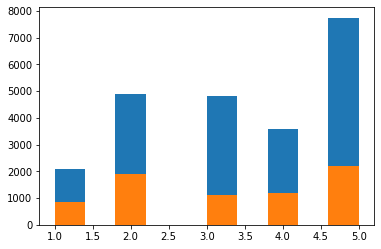

In [73]:
plt.hist(train_df['work_code'])
plt.hist(train_df.loc[train_df['approved'] == 1]['work_code'])
plt.show()

`month_income` - доход

In [74]:
print(compare_samples('month_income'))

Свойства распределений:
Сравнение признака month_income:
Выборочное среднее на выборке выданных кредитов = 43297.28986105379
Выборочное среднее на всей выборке = 39363.1899982696

Медиана на выборке выданных кредитов = 50000.0
Медиана на всей выборке = 35000.0

Дисперсия на выборке выданных кредитов = 174703158.58699265
Дисперсия на всей выборке = 192866670.48970485

Стандартное отклонение на выборке выданных кредитов = 13217.532242706755
Стандартное отклонение на всей выборке = 13887.644526330045

Статистические тесты для сравнения распределений:
t-критерий Стюдента:
Значение критерия = -21.307315250782764, p-value = 5.245282697773357e-100

u-критерий Манна-Уитни
Значение критерия = 70456099.5, p-value = 1.1250886539120337e-104

Критерий Колмогорова-Смирнова
Значение критерия = 0.12143888726100693, p-value = 1.579172550433333e-71

Тест Левена
Значение критерия = 10.757566167172532, p-value = 0.0010397070679816628




In [75]:
stats_df = pd.DataFrame.from_dict({
    'feature': feature_name,
    't-test': t_test,
    'u-test': u_test,
    'ks-test': ks_test,
    'levene-test': lev_test
})

In [76]:
stats_df

,feature,t-test,u-test,ks-test,levene-test
0,cred_sum_cc_all,5.285566e-93,1.833134e-189,7.023697e-173,5.737413e-67
1,mfo_inqs_count_month,2.415348e-133,2.738596e-203,3.672665e-178,6.531564e-73
2,all_closed_creds_sum_all,3.610970e-57,0.000000e+00,1.377200e-296,4.874250e-34
3,bank_inqs_count_quarter,0.000000e+00,0.000000e+00,0.000000e+00,9.296626e-99
4,cred_max_overdue_max_ly,6.638624e-03,3.215493e-05,3.522854e-05,6.638624e-03
5,all_active_creds_sum_all,1.571707e-72,0.000000e+00,0.000000e+00,1.231085e-53
6,mfo_last_days_all,4.663834e-125,0.000000e+00,0.000000e+00,1.414125e-124
7,cred_sum_cc_ly,9.601327e-134,1.457390e-229,4.045699e-174,9.601327e-134
8,cred_sum_debt_all_all,8.587301e-111,0.000000e+00,0.000000e+00,1.243509e-83
9,all_closed_creds_sum_ly,3.131888e-150,0.000000e+00,0.000000e+00,2.613128e-112


In [77]:
stats_df.sort_values(by='t-test')[:10]

,feature,t-test,u-test,ks-test,levene-test
3,bank_inqs_count_quarter,0.000000e+00,0.000000e+00,0.000000e+00,9.296626e-99
18,all_creds_count_lm,0.000000e+00,0.000000e+00,0.000000e+00,7.741253e-195
10,mfo_cred_mean_sum_3lm,3.835027e-227,0.000000e+00,0.000000e+00,2.279474e-27
15,mfo_closed_count_ly,6.285441e-209,0.000000e+00,0.000000e+00,4.055585e-137
12,all_creds_count_all,9.599875e-170,0.000000e+00,0.000000e+00,2.084725e-48
13,cred_day_overdue_all_sum_all,7.043133e-152,0.000000e+00,4.873988e-290,7.043133e-152
9,all_closed_creds_sum_ly,3.131888e-150,0.000000e+00,0.000000e+00,2.613128e-112
7,cred_sum_cc_ly,9.601327e-134,1.457390e-229,4.045699e-174,9.601327e-134
1,mfo_inqs_count_month,2.415348e-133,2.738596e-203,3.672665e-178,6.531564e-73
6,mfo_last_days_all,4.663834e-125,0.000000e+00,0.000000e+00,1.414125e-124


In [79]:
stats_df.sort_values(by='u-test')[:15]

,feature,t-test,u-test,ks-test,levene-test
9,all_closed_creds_sum_ly,3.131888e-150,0.000000e+00,0.000000e+00,2.613128e-112
2,all_closed_creds_sum_all,3.610970e-57,0.000000e+00,1.377200e-296,4.874250e-34
3,bank_inqs_count_quarter,0.000000e+00,0.000000e+00,0.000000e+00,9.296626e-99
15,mfo_closed_count_ly,6.285441e-209,0.000000e+00,0.000000e+00,4.055585e-137
5,all_active_creds_sum_all,1.571707e-72,0.000000e+00,0.000000e+00,1.231085e-53
6,mfo_last_days_all,4.663834e-125,0.000000e+00,0.000000e+00,1.414125e-124
8,cred_sum_debt_all_all,8.587301e-111,0.000000e+00,0.000000e+00,1.243509e-83
18,all_creds_count_lm,0.000000e+00,0.000000e+00,0.000000e+00,7.741253e-195
10,mfo_cred_mean_sum_3lm,3.835027e-227,0.000000e+00,0.000000e+00,2.279474e-27
12,all_creds_count_all,9.599875e-170,0.000000e+00,0.000000e+00,2.084725e-48


In [81]:
stats_df.sort_values(by='ks-test')[:15]

,feature,t-test,u-test,ks-test,levene-test
9,all_closed_creds_sum_ly,3.131888e-150,0.000000e+00,0.000000e+00,2.613128e-112
3,bank_inqs_count_quarter,0.000000e+00,0.000000e+00,0.000000e+00,9.296626e-99
15,mfo_closed_count_ly,6.285441e-209,0.000000e+00,0.000000e+00,4.055585e-137
5,all_active_creds_sum_all,1.571707e-72,0.000000e+00,0.000000e+00,1.231085e-53
6,mfo_last_days_all,4.663834e-125,0.000000e+00,0.000000e+00,1.414125e-124
8,cred_sum_debt_all_all,8.587301e-111,0.000000e+00,0.000000e+00,1.243509e-83
18,all_creds_count_lm,0.000000e+00,0.000000e+00,0.000000e+00,7.741253e-195
10,mfo_cred_mean_sum_3lm,3.835027e-227,0.000000e+00,0.000000e+00,2.279474e-27
12,all_creds_count_all,9.599875e-170,0.000000e+00,0.000000e+00,2.084725e-48
2,all_closed_creds_sum_all,3.610970e-57,0.000000e+00,1.377200e-296,4.874250e-34


In [82]:
stats_df.sort_values(by='levene-test')[:10]

,feature,t-test,u-test,ks-test,levene-test
18,all_creds_count_lm,0.000000e+00,0.000000e+00,0.000000e+00,7.741253e-195
13,cred_day_overdue_all_sum_all,7.043133e-152,0.000000e+00,4.873988e-290,7.043133e-152
15,mfo_closed_count_ly,6.285441e-209,0.000000e+00,0.000000e+00,4.055585e-137
7,cred_sum_cc_ly,9.601327e-134,1.457390e-229,4.045699e-174,9.601327e-134
6,mfo_last_days_all,4.663834e-125,0.000000e+00,0.000000e+00,1.414125e-124
9,all_closed_creds_sum_ly,3.131888e-150,0.000000e+00,0.000000e+00,2.613128e-112
3,bank_inqs_count_quarter,0.000000e+00,0.000000e+00,0.000000e+00,9.296626e-99
11,delay_more_sum_all,4.650841e-95,1.273630e-220,6.920509e-204,4.650841e-95
8,cred_sum_debt_all_all,8.587301e-111,0.000000e+00,0.000000e+00,1.243509e-83
1,mfo_inqs_count_month,2.415348e-133,2.738596e-203,3.672665e-178,6.531564e-73


Судя по нашей сводной таблице наименьшими значениями p-value обладают:
- `all_creds_count_lm`
- `bank_inqs_count_quarter`
- `all_closed_creds_sum_ly`
- `mfo_closed_count_ly`
- `mfo_last_days_all`
- `mfo_cred_mean_sum_3lm`
- `all_creds_count_all`

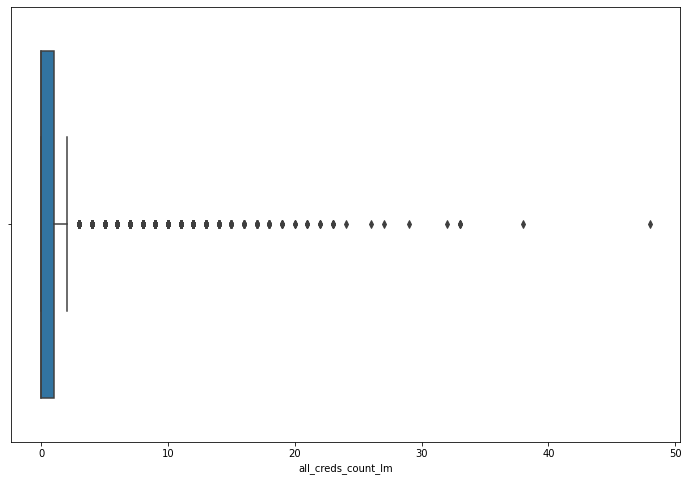

In [104]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.boxplot(data=train_df, x='all_creds_count_lm', orient="h");

<AxesSubplot:xlabel='all_creds_count_lm'>

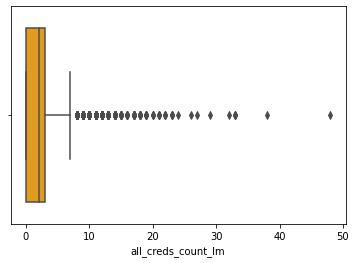

In [100]:
sns.boxplot(data=train_df.loc[train_df['approved'] == 1], x='all_creds_count_lm', orient="h", color="orange")

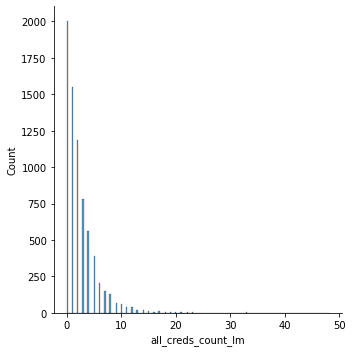

In [103]:
sns.displot(train_df.loc[train_df['approved'] == 1]['all_creds_count_lm']);

In [83]:
stats_df.sort_values(by='t-test', ascending=False)[:5]

,feature,t-test,u-test,ks-test,levene-test
4,cred_max_overdue_max_ly,6.638624e-03,3.215493e-05,3.522854e-05,6.638624e-03
14,cred_max_overdue_max_3lm,2.885031e-05,4.562170e-09,1.202917e-03,2.885031e-05
17,count_overdue_all_3lm,3.856730e-09,9.784647e-12,1.773370e-03,3.856730e-09
16,cred_sum_overdue_cc_all,1.667795e-20,9.968741e-60,2.715270e-21,1.667795e-20
2,all_closed_creds_sum_all,3.610970e-57,0.000000e+00,1.377200e-296,4.874250e-34


In [84]:
stats_df.sort_values(by='u-test', ascending=False)[:5]

,feature,t-test,u-test,ks-test,levene-test
4,cred_max_overdue_max_ly,6.638624e-03,3.215493e-05,3.522854e-05,6.638624e-03
14,cred_max_overdue_max_3lm,2.885031e-05,4.562170e-09,1.202917e-03,2.885031e-05
17,count_overdue_all_3lm,3.856730e-09,9.784647e-12,1.773370e-03,3.856730e-09
16,cred_sum_overdue_cc_all,1.667795e-20,9.968741e-60,2.715270e-21,1.667795e-20
19,month_income,5.245283e-100,1.125089e-104,1.579173e-71,1.039707e-03


In [85]:
stats_df.sort_values(by='ks-test', ascending=False)[:5]

,feature,t-test,u-test,ks-test,levene-test
17,count_overdue_all_3lm,3.856730e-09,9.784647e-12,1.773370e-03,3.856730e-09
14,cred_max_overdue_max_3lm,2.885031e-05,4.562170e-09,1.202917e-03,2.885031e-05
4,cred_max_overdue_max_ly,6.638624e-03,3.215493e-05,3.522854e-05,6.638624e-03
16,cred_sum_overdue_cc_all,1.667795e-20,9.968741e-60,2.715270e-21,1.667795e-20
19,month_income,5.245283e-100,1.125089e-104,1.579173e-71,1.039707e-03


In [86]:
stats_df.sort_values(by='levene-test', ascending=False)[:5]

,feature,t-test,u-test,ks-test,levene-test
4,cred_max_overdue_max_ly,6.638624e-03,3.215493e-05,3.522854e-05,6.638624e-03
19,month_income,5.245283e-100,1.125089e-104,1.579173e-71,1.039707e-03
14,cred_max_overdue_max_3lm,2.885031e-05,4.562170e-09,1.202917e-03,2.885031e-05
17,count_overdue_all_3lm,3.856730e-09,9.784647e-12,1.773370e-03,3.856730e-09
16,cred_sum_overdue_cc_all,1.667795e-20,9.968741e-60,2.715270e-21,1.667795e-20


Судя по сводной таблице, наибольшими значениями p-value обладают:
- `cred_max_overdue_max_ly`
- `cred_max_overdue_max_3lm`
- `count_overdue_all_3lm`
- `cred_sum_overdue_cc_all`